# Python for (open) Neuroscience

_Lecture 1.5_ - More plotting

Luigi Petrucco

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/vigji/python-cimec-2025/blob/main/lectures/Lecture1.5_More-plotting.ipynb)

## Info

- homework due by next Monday!
- will send around questionnaire for choosing final optional lectures
- start thinking about projects!

### Why knowing how to plot matters

- Many people end up postprocessing figures using editors like Inkscape or Adobe Illustrator
- HUUUGE waste of time!
- Also, a bottleneck on reproducibility
- Code-only plots are much easier to remake

### Why knowing how to plot doesn't matter

"Please, give me code that in a top window plots dataframe `df`  column `y` vs column `x` as a scatter, and in a bottom window.."

## More on plotting using `matplotlib`

Recap: the standard plotting library in Python is `matplotlib`.

In [1]:
from matplotlib import pyplot as plt  # import plotting library

import numpy as np
import pandas as pd

### Plotting functions in `matplotlib`

As we have seen, in `matplotlib` we call some plotting function (`plt.plot()`, `plt.scatter()`, `plt.matshow()`...) to make simple figures of various kinds

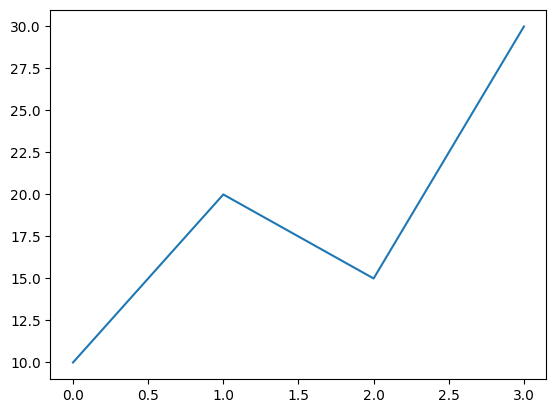

In [2]:
plt.plot([10, 20, 15, 30])

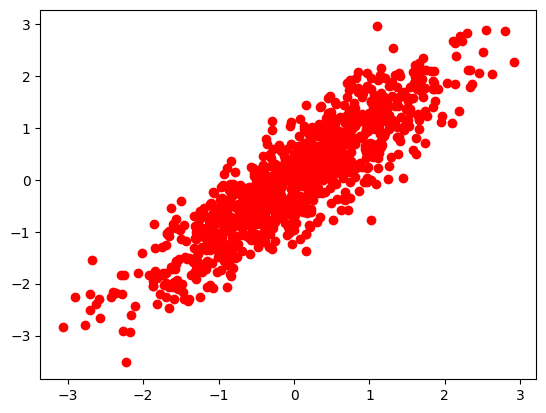

In [3]:
x = np.random.randn(1000)
y = x+np.random.randn(1000)*0.5

plt.scatter(x, y, color="red")

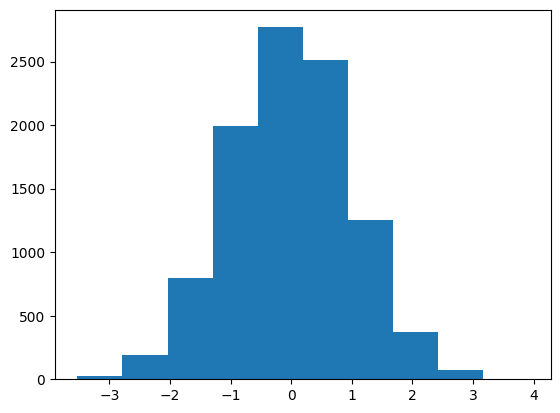

In [4]:
plt.hist(np.random.randn(10000))
plt.show()

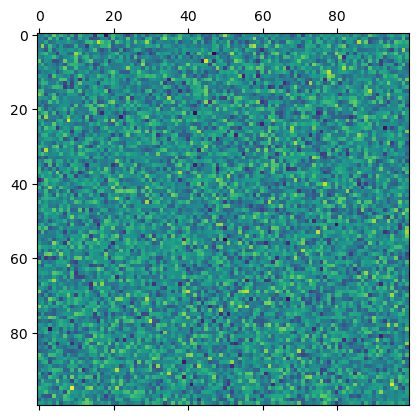

In [190]:
plt.matshow(np.random.randn(100, 100))

### Functions to control plot aspect

We can control attributes of a simple plot with functions such as `plt.xlabel()` or `plt.xlim()`:

(0.0, 350.0)

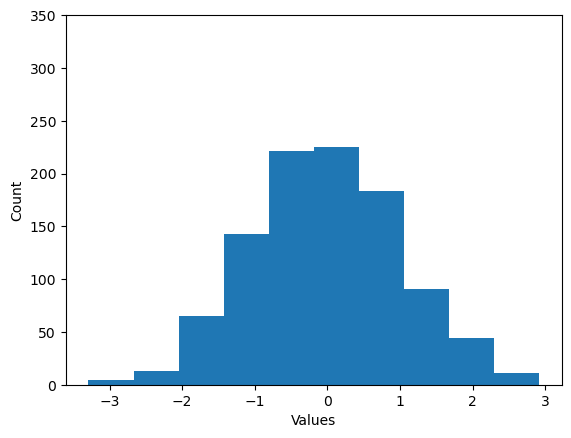

In [144]:
plt.hist(np.random.randn(1000))

plt.xlabel("Values")  # control labels
plt.ylabel("Count")

plt.ylim(0, 350)  # control y range

## Object oriented interface

To have a finer control over plots, `matplotlib` can be used in an object-oriented way, which can be more flexible and expressive.

We start by creating a `plt.Figure` and `plt.Axes` object using the `plt.subplots()` function:

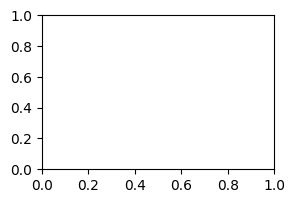

In [5]:
# this will create a figure and an axis object:
fig, ax = plt.subplots(figsize=(3,2))

The difference between `plt.Figure` object and a `plt.Axes` can (and will) be confusing. In short, we can say that:
- `plt.Figure` objects represent the whole figure, i.e., the canvas that plots are drawn on. In the case of a figure that contains multiple subplots, figure-level changes apply to all subplots
- `plt.Axes` objects represent the axes and their content. In the case of a figure that contains multiple subplots, axes-level changes apply to one specific subplot

![matplotlib hierarchy](https://www.janmeppe.com/assets/2019-12-24-matplotlib/matplotlib_hierarchy.png)

Take a look at [this article](https://realpython.com/python-matplotlib-guide/) on realpython.com for a deeper look into Matplotlib terminology.

In [39]:
type(fig), type(ax)

(matplotlib.figure.Figure, matplotlib.axes._axes.Axes)

if we leave `fig` as the last line of the cell, the notebook shows us the `Figure` object:

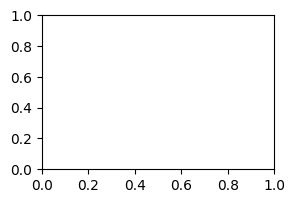

In [6]:
fig

### `Axes` method for plotting

`Axes` objects have methods to add plots: `ax.plot()`, `ax.scatter()`, `ax.imshow()`...

Exactly like the functions we saw above, but now called as methods from the axis we want to add the plots to:

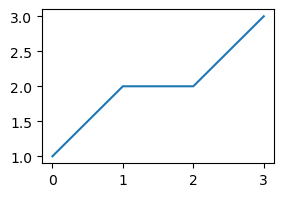

In [192]:
fig, ax = plt.subplots(figsize=(3,2)) # this will create a figure and an axes object

# We can now call methods of the axes object:
ax.plot([1, 2, 2, 3])

Modify an axis object apparence using `ax.set()`

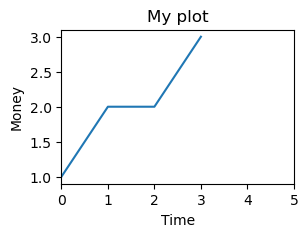

In [193]:
# We can modify the aspect of the axis using its methods:
ax.set(xlabel="Time", ylabel="Money", title="My plot", xlim=(0, 5))

# as we did the modification in a new cell, 
# to see the updated figure object we type it here again:
fig

My recommendation is to get used to the object oriented interface!

### Multiple plots on the same axis

We can add multiple rounds of data plots on the same axis by calling more than one plotting method

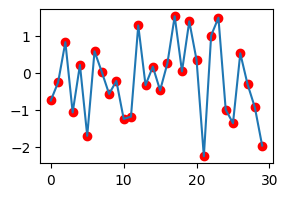

In [8]:
fig, ax = plt.subplots(figsize=(3,2))
data = np.random.randn(30)

ax.plot(data)  # one plot
#ax.plot(-data)  # one plot
ax.scatter(np.arange(len(data)), data, c="red")  # another plot

We can use the `zorder=` argument to specify the overlapping order

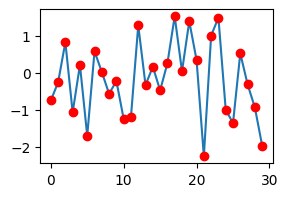

In [9]:
fig, ax = plt.subplots(figsize=(3,2))
ax.plot(data)
ax.scatter(np.arange(len(data)), data, c="red", zorder=2)

### `plt.axvline()`/`plt.axhline()`

Useful to visualize lines for thresholds, stimulus onsets, etc.

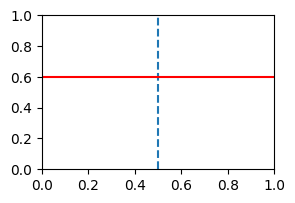

In [14]:
fig, ax = plt.subplots(figsize=(3,2))
ax.axvline(0.5, linestyle="--")  # vertical line
ax.axhline(0.6, c="r")  # horizontal line

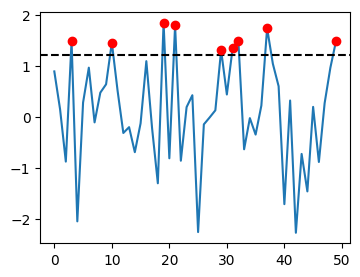

In [15]:
fig, ax = plt.subplots(figsize=(4,3))
data = np.random.normal(0, 1, 50)
thr = 1.2

ax.plot(data)  # blue line plot
ax.axhline(thr, c="k", linestyle="dashed")  # horizontal line for threshold
ax.scatter(np.argwhere(data > thr),   # scatter plot
           data[np.argwhere(data > thr)], c="r", zorder=2)

### `plt.axhspan()`/`plt.axvspan()`

We can also highlight areas in the plot with the  `plt.axhspan()` and `plt.axvspan()` functions:

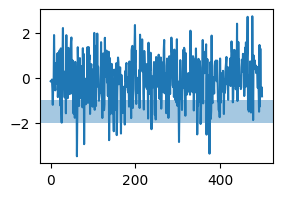

In [17]:
fig, ax = plt.subplots(figsize=(3,2))
ax.plot(np.random.normal(0, 1, 500))
ax.axhspan(-1, -2, alpha=0.4)  # vertical band

We can customize "edge" (borders) and "face" (inner part) appearance:

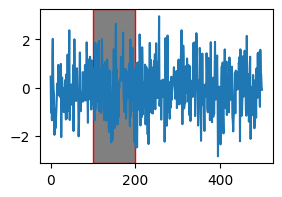

In [18]:
fig, ax = plt.subplots(figsize=(3,2))
ax.plot(np.random.normal(0, 1, 500))
# fc: facecolor; ec: edgecolor
ax.axvspan(100, 200, fc="gray",  ec="red")

### Plot customization

### Colors in `matplotlib`:

- color name: `"red"`, `"green"`, `"maroon"`, `"teal"`...(list [here](https://matplotlib.org/stable/gallery/color/named_colors.html))
- normalized rgb value (between 0 and 1): `(0.8, 0.1, 0.2)`...
- default color cycle: `"C0"`, `"C1"`, `"C2"`...
- Endless shades of gray: `".3"` `".5"` `".7"`...

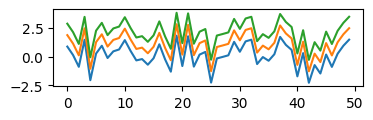

In [19]:
plt.figure(figsize=(4, 1))
plt.plot(data)
plt.plot(data+1)
plt.plot(data+2)
plt.show()

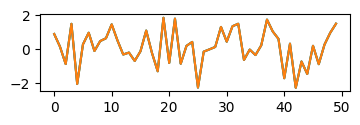

In [20]:
plt.figure(figsize=(4, 1))
plt.plot(data, c="C2")
plt.plot(data, c="C0")
plt.plot(data, c="C1")
plt.show()

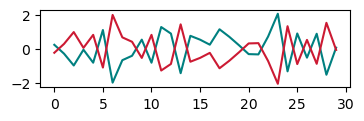

In [188]:
plt.figure(figsize=(4, 1))
plt.plot(data, c="teal")
plt.plot(-data, c=(0.8, 0.1, 0.2))
plt.show()

### Configuration files

`matplotlib` has a bunch of different styles that you can choose from. Check them out [here](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html)!

In [21]:
# To switch styles:
plt.style.use('dark_background')

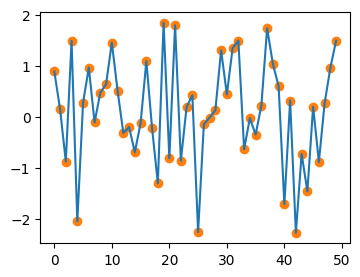

In [24]:
plt.figure(figsize=(4, 3))
plt.plot(data)
plt.scatter(np.arange(len(data)), data, c="C1")
plt.show()

In [23]:
plt.style.use('default') # restore default

Practicals 1.5.0

## Matplotlib subplots

Using `plt.subplots()` we can also create a figure with multiple panels:

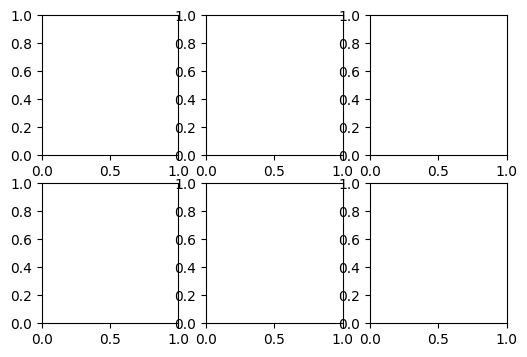

In [30]:
fig, axes = plt.subplots(2,3,  figsize=(6, 4))

## A `np.array` of axes

Now axes will be a 2x3 array `numpy` array of axis objects!

In [27]:
type(axes)

numpy.ndarray

In [206]:
axes.shape

(2, 3)

In [32]:
type(axes[0, 0])  # elements inside the array will be axes

matplotlib.axes._axes.Axes

## Indexing and plotting

To plot on each of the axes, we first select an axis using indexing, and then we call its methods to plot:

In [33]:
# access one subplot from the grid.
# From here we can plot using plotting methods

axes[0, 0] 

<Axes: >

So we first index the correct axis, and then we use its plotting method:

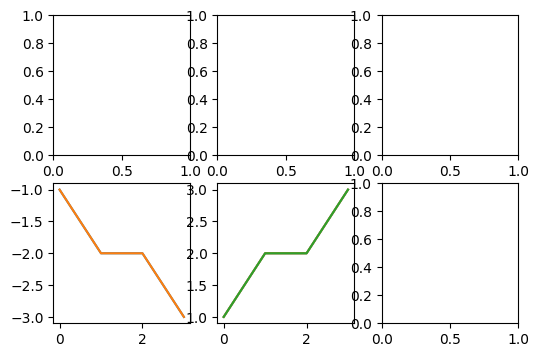

In [36]:
axes[1, 1].plot([1, 2, 2, 3])  # plot something in second row, first column:
axes[1, 0].plot(-np.array([1, 2, 2, 3]))  # plot something in second row, first column:

fig

To make different plots often we iterate over multiple axes:

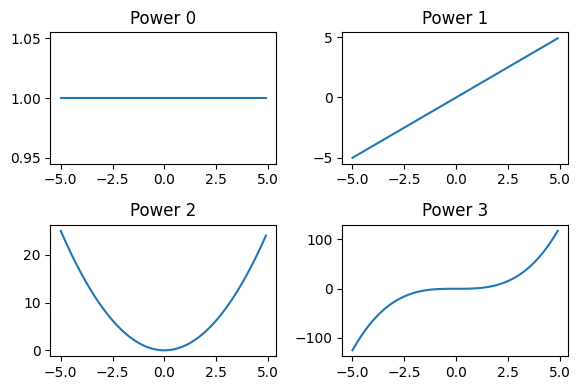

In [37]:
fig, axes = plt.subplots(2, 2, figsize=(6, 4))
x = np.arange(-5, 5, 0.1)

# Double loop over rows and columns
for col_idx  in range(2):
    for row_idx in range(2):
        i = col_idx + row_idx*2
        axes[row_idx, col_idx].plot(x, x**i)  # Plot on it
        axes[row_idx, col_idx].set(title=f"Power {i}")  # Set title

plt.tight_layout()  # This function separate plots better

## Saving plots

From matplotlib we can export both `pdf`s (recommended! vector images) and `png`s for our plots

In [38]:
fig.savefig("/Users/vigji/Desktop/test_img.pdf")  # save pdf
fig.savefig("/Users/vigji/Desktop/test_img.png")  # save png

In [39]:
# If you are working with google colab, you need an additional step to download the image
# on your computer:

from google.colab import files
plt.savefig("filename.png")
files.download("filename.png")  # download on your pc file from (virtual) Colab folder

ModuleNotFoundError: No module named 'google'

Practicals 1.5.1

## Advanced plotting with `seaborn`


`seaborn` is an advanced plotting library that offers some special plotting functions and powerful integration with `pandas`

In [55]:
import seaborn as sns

import pandas as pd

Let's take our usual pandas dataframe with datapoints and groups information:

In [56]:
data_df = pd.read_csv("https://github.com/vigji/python-cimec-2024/raw/main/lectures/files/swarmplot_data.csv")
data_df.head()

,Unnamed: 0,data,label
0,0,6.215095,group1
1,1,5.252273,group1
2,2,6.369213,group1
3,3,6.857429,group1
4,4,8.688802,group1


## `sns.swarmplot()`

Swarmplots are very useful to represent efficiently many individual datapoints

(Instead of dynamite plots! Blow up dynamite plots!)

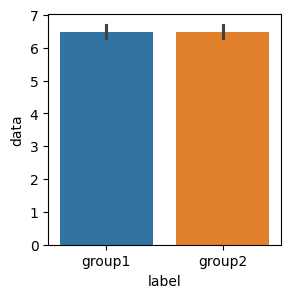

In [42]:
fig, ax = plt.subplots(figsize=(3, 3))
sns.barplot(data_df, 
            x="label",
            y="data", 
            hue="label",
            errorbar="se")
plt.show()

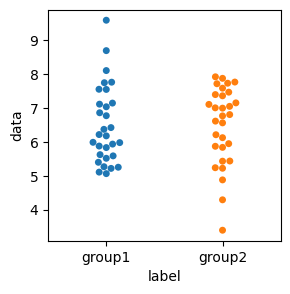

In [43]:
fig, ax = plt.subplots(figsize=(3, 3))
sns.swarmplot(data_df, 
              x="label",
              hue="label",
              y="data")

plt.show()

[Public service campaign]

    Respect each data point! 
  
They're costly and painful to get. If they're not out in your chart (and/or publicly available) they are lost forever!

### `sns.violinplot()`

Violin plots use kernel density estimation (KDE) instead of histograms.

KDE is a way of estimating a continuous probability distribution from many many samples (my recommandation: use only with > 100s of points!)

<Axes: xlabel='data', ylabel='label'>

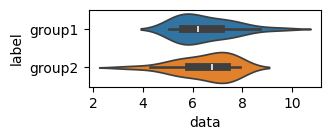

In [48]:
plt.figure(figsize=(3, 1))
sns.violinplot(data_df, x="data", y="label", hue="label", orient="h")

To transparently show distributions, we can also overlay individual datapoints and distribution estimations (violin plots, boxplots, etc):

<Axes: xlabel='data', ylabel='label'>

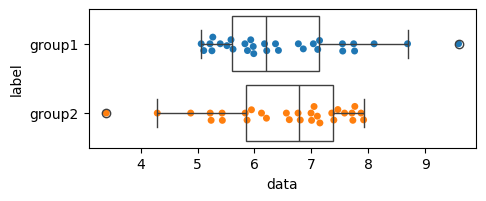

In [49]:
plt.figure(figsize=(5, 1.8))
sns.swarmplot(data_df, x="data", y="label", hue="label", 
              orient="h", zorder=-1)
sns.boxplot(data_df, x="data", y="label", hue="label",
            boxprops={'facecolor':'none'}, orient="h")

### Combine `matplotlib` and `seaborn`

`seaborn` and `matplotlib` can be combined together in the same panels.

To use a `seaborn` function with some given `axis` object, we can pass it as the `ax=` argument

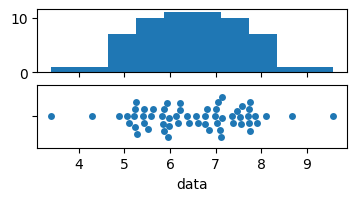

In [51]:
fig, axs = plt.subplots(2, 1, figsize=(4, 1.8), sharex=True)

# we are passing the ax= argument to put the swarmplot in the second axis:
sns.swarmplot(data_df["data"], orient="h", ax=axs[1])
axs[0].hist(data_df["data"])
plt.show()

### Why knowing how to plot matters

- Many people end up postprocessing figures using editors like Inkscape or Adobe Illustrator
- HUUUGE waste of time!
- Also, a bottleneck on reproducibility
- Code-only plots are much easier to remake

### Why knowing how to plot doesn't matter

"Please, give me code that in a top window plots dataframe `df`  column `y` vs column `x` as a scatter, and in a bottom window.."

## Using `seaborn` for layered plots

`seaborn` has been developed to read as much information as possible from properly formatted `pandas.DataFrame`s! 

It offers out-of-the box tools to show many kind of data.

In [52]:
subjects_df = pd.read_csv("https://github.com/vigji/python-cimec-2024/raw/main/lectures/files/seaborn_df.csv")

subjects_df.head()


,Unnamed: 0,genotype,age,performance,dataset,sex
0,0,wt,39.1,18.7,dataset1,Male
1,1,wt,39.5,17.4,dataset1,Female
2,2,wt,40.3,18.0,dataset1,Female
3,4,wt,36.7,19.3,dataset1,Female
4,5,wt,39.3,20.6,dataset1,Male


<Axes: xlabel='age', ylabel='genotype'>

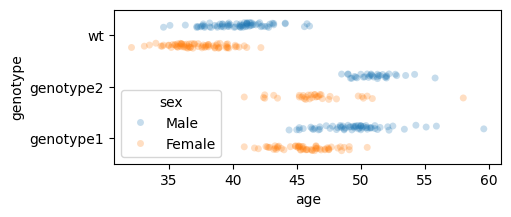

In [57]:
# Show each observation with a scatterplot
plt.figure(figsize=(5, 2))
sns.stripplot(
    data=subjects_df, x="age", y="genotype", hue="sex",
    dodge=True, alpha=.25, zorder=1, legend=True,
)

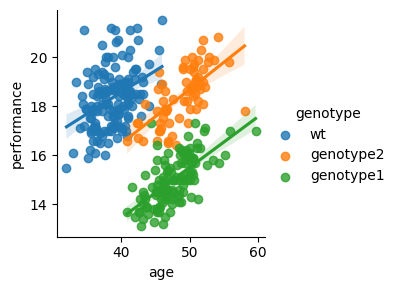

In [60]:
g = sns.lmplot(
    data=subjects_df,
    x="age", y="performance", hue="genotype",
    height=3
)

Many more examples in the gallery 
[https://seaborn.pydata.org/examples/index.html](here)

Fore some data visualization tips:

https://github.com/cxli233/FriendsDontLetFriends

Practicals 1.5.2